<a href="https://colab.research.google.com/github/kurtsenol/machine-learning/blob/master/Kaggle/house_prices_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
with open('/content/drive/My Drive/house-prices/data_description.txt', 'r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df_train = pd.read_csv("/content/drive/My Drive/house-prices/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/house-prices/test.csv")

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [ ]:
n_train =df_train.shape[0]
n_train

1460

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_test.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
MSSubClass         0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

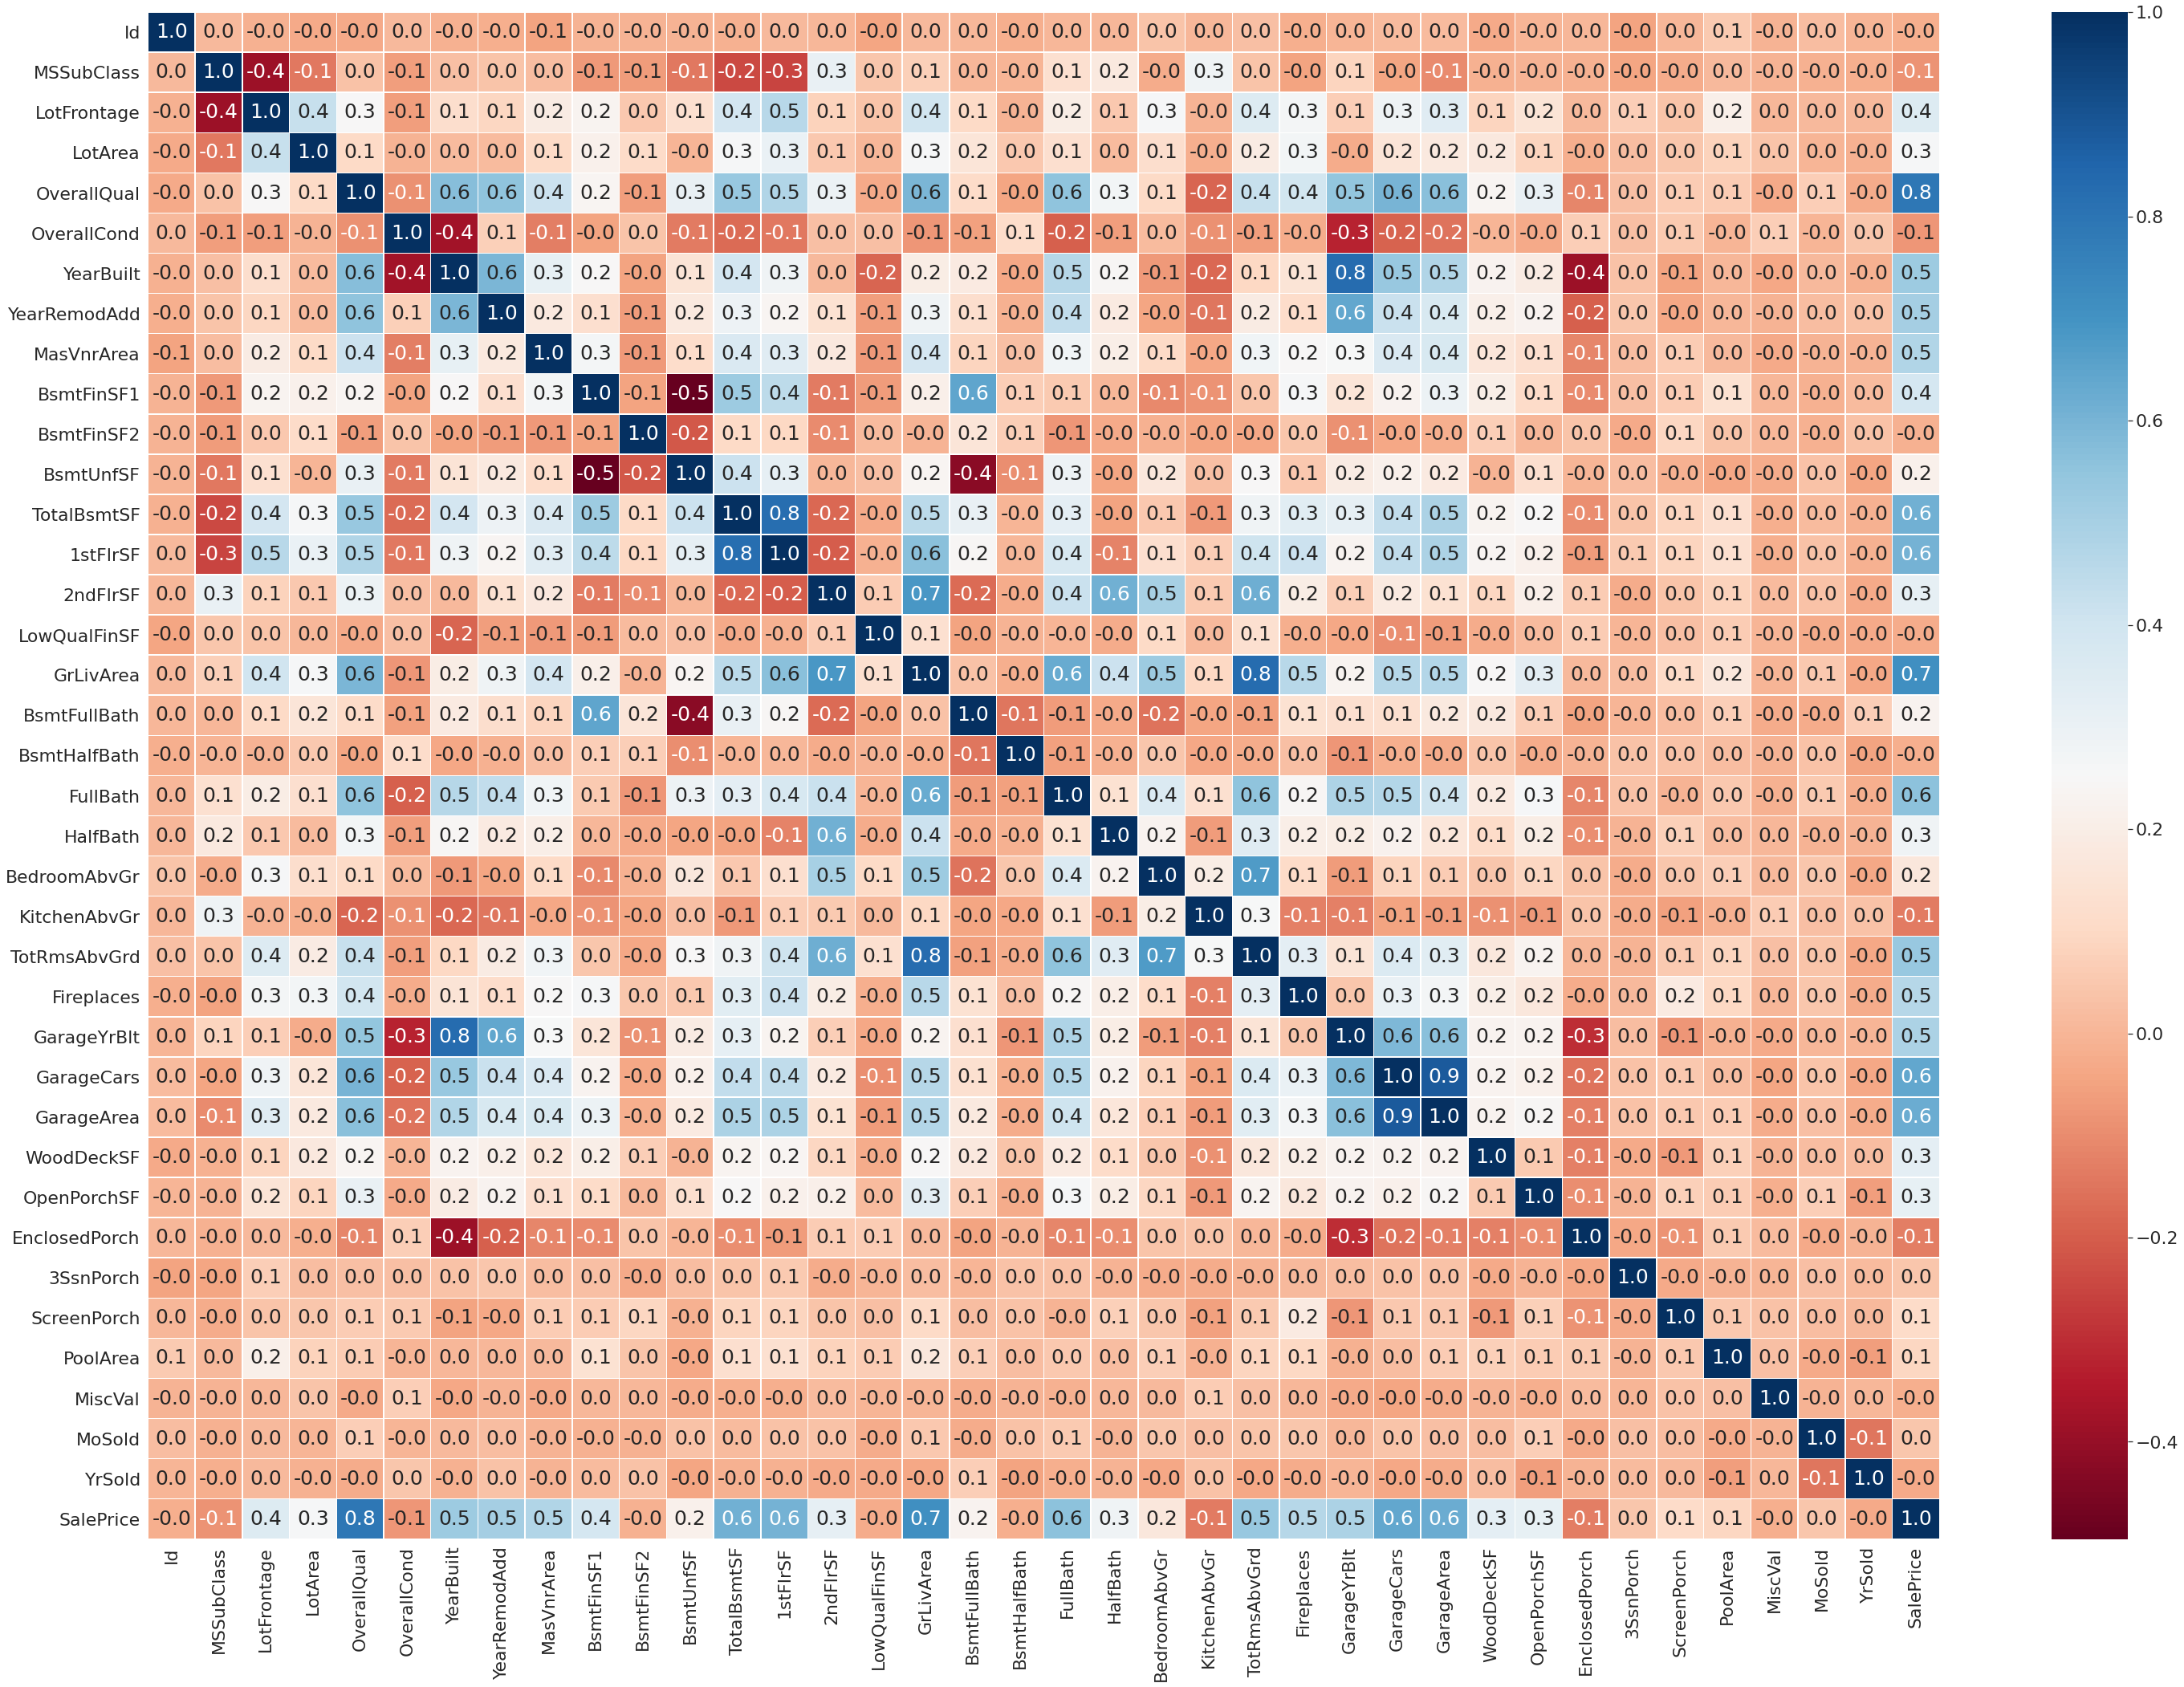

In [ ]:
import seaborn as sns

sns.set(font_scale=2)
plt.figure(figsize = (50,35))
sns.heatmap(df_train.corr(), annot=True, cmap='RdBu', annot_kws={"size": 25},fmt='.1f', linewidths=.5);

In [ ]:
labels = df_train["SalePrice"]
df_train.drop(["SalePrice"], axis=1, inplace=True)

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,

convert "MSSubClass" column type from numerical to category:

In [ ]:
df["MSSubClass"] = df["MSSubClass"].astype("category")

### Missing Data

Let's search for null values. Print 20 features based on their missing value percentages.

In [ ]:
nullity = df.isnull().mean()*100
nullity.sort_values(ascending=False).head(20)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageQual       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageType       5.378554
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtHalfBath     0.068517
dtype: float64

Let's visualize missing value percentages:

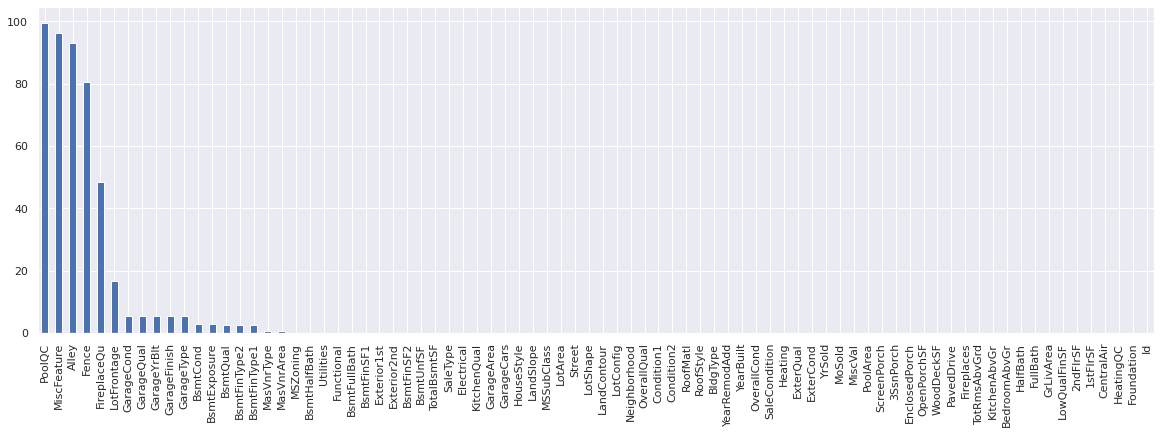

In [ ]:
sns.set()
plt.figure(figsize=(20,6))
nullity.sort_values(ascending=False).plot(kind="bar");

Fill missing values for "PoolQC", "MiscFeature", "Alley", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtQual", "FireplaceQu" columns with None based on data description file.

In [ ]:
df[["PoolQC", "MiscFeature", "Alley", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtQual", "FireplaceQu"]] =\
df[["PoolQC", "MiscFeature", "Alley", "Fence", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtFinType2", "BsmtFinType1", "BsmtExposure", "BsmtCond", "BsmtQual", "FireplaceQu"]] .fillna("None")

In [ ]:
nullity = df.isnull().mean()*100
nullity.sort_values(ascending=False).head(30)

LotFrontage      16.649538
GarageYrBlt       5.447071
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
BsmtHalfBath      0.068517
BsmtFullBath      0.068517
Utilities         0.068517
BsmtFinSF1        0.034258
Exterior1st       0.034258
Exterior2nd       0.034258
GarageCars        0.034258
GarageArea        0.034258
KitchenQual       0.034258
Electrical        0.034258
SaleType          0.034258
TotalBsmtSF       0.034258
BsmtUnfSF         0.034258
BsmtFinSF2        0.034258
ExterQual         0.000000
RoofStyle         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
RoofMatl          0.000000
ExterCond         0.000000
SaleCondition     0.000000
YearRemodAdd      0.000000
BsmtExposure      0.000000
dtype: float64

In [ ]:
# fill in the missing values in 'LotFrontage' column, with the mean values of those grouped by 'Neighborhood' and "MSSubClass".
df['LotFrontage']=df.groupby('Neighborhood')["LotFrontage"].apply(lambda x: x.fillna(x.mean()))

In [ ]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)

In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [ ]:
df['MasVnrArea']=df['MasVnrArea'].fillna(0)

In [ ]:
df['MSZoning']=df.groupby('Neighborhood')["MSZoning"].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])

In [ ]:
df[["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "GarageCars", "GarageArea", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF2"]]=df[["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "GarageCars", "GarageArea", "TotalBsmtSF", "BsmtUnfSF", "BsmtFinSF2"]].fillna(0)

In [ ]:
df[["Utilities", "Exterior1st", "Exterior2nd", "KitchenQual", "Electrical", "SaleType"]] =df[["Utilities", "Exterior1st", "Exterior2nd", "KitchenQual", "Electrical", "SaleType"]].apply(lambda x :x.fillna(x.mode()[0]))

In [ ]:
df['Total_Square_Feet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])
df.drop(['BsmtFinSF1','BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'], axis=1, inplace=True)

In [ ]:
df['Total_Bath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df.drop(['FullBath','HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [ ]:
df['Total_Porch_Area'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
df.drop(['OpenPorchSF','3SsnPorch', 'EnclosedPorch', 'ScreenPorch', "WoodDeckSF"], axis=1, inplace=True)

In [ ]:
nullity = df.isnull().mean()*100
nullity.sort_values(ascending=False).head()

Total_Porch_Area    0.0
Exterior2nd         0.0
OverallCond         0.0
YearBuilt           0.0
YearRemodAdd        0.0
dtype: float64

In [ ]:
df.dtypes

Id                      int64
MSSubClass           category
MSZoning               object
LotFrontage           float64
LotArea                 int64
                       ...   
SaleType               object
SaleCondition          object
Total_Square_Feet     float64
Total_Bath            float64
Total_Porch_Area        int64
Length: 69, dtype: object

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# df_train_KNN_imputed = df_train.copy(deep=True)

# # Create dictionary for Ordinal encoders
# ordinal_enc_dict = {}

# # Loop over columns to encode
# for col_name in df_train_KNN_imputed.select_dtypes("object"):

#     # Create Ordinal encoder for col
#     ordinal_enc_dict[col_name] = OrdinalEncoder()
#     col = df_train_KNN_imputed[col_name]
    
#     # Select non-null values of col
#     col_not_null = col[col.notnull()]
#     reshaped_vals = col_not_null.values.reshape(-1, 1)
#     encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
#     # Store the values to non-null values of the column in users
#     df_train_KNN_imputed.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [ ]:
# from fancyimpute import KNN

In [ ]:
# # Create KNN imputer
# KNN_imputer = KNN()

# # Impute and round the users DataFrame
# df_train_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(df_train_KNN_imputed))

# # Loop over the column names in users
# for col_name in df_train[["MasVnrType", "Electrical"]]:
    
#     # Reshape the data
#     reshaped = df_train_KNN_imputed[col_name].values.reshape(-1, 1)
    
#     # Perform inverse transform of the ordinally encoded columns
#     df_train[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Let's check if there is any missing values in categorical values:

In [ ]:
df_train.select_dtypes("object").isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Let's look at numerical columns:

Assign 0 to "MasVnrArea" column which has "MasVnrType" value of "None"

In [ ]:
df_train.loc[df_train.MasVnrType=="None", "MasVnrArea"] = 0

Assign 0 to "GarageYrBlt" column which has "GarageType" value of "None"

In [ ]:
df_train.loc[df_train.GarageType=="None", "GarageYrBlt"] = 0

In [ ]:
nullity = df_train.isnull().mean()*100
nullity.sort_values(ascending=False).head()

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
dtype: float64

In [ ]:
# # Import IterativeImputer from fancyimpute
# from fancyimpute import IterativeImputer

# # Copy diabetes to diabetes_mice_imputed
# df_train_mice_imputed = df_train.copy(deep=True)

# # Create dictionary for Ordinal encoders
# ordinal_enc_dict = {}

# # Loop over columns to encode
# for col_name in df_train_mice_imputed.select_dtypes("object"):

#     # Create Ordinal encoder for col
#     ordinal_enc_dict[col_name] = OrdinalEncoder()
#     col = df_train_mice_imputed[col_name]
    
#     # Select non-null values of col
#     col_not_null = col[col.notnull()]
#     reshaped_vals = col_not_null.values.reshape(-1, 1)
#     encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
#     # Store the values to non-null values of the column in users
#     df_train_mice_imputed.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

# # Initialize IterativeImputer
# mice_imputer = IterativeImputer()

# # Impute using fit_tranform on diabetes
# df_train_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(df_train_mice_imputed)

In [ ]:
# nullity = df_train_mice_imputed.isnull().mean()*100
# nullity.sort_values(ascending=False).head()

In [ ]:
ord_1 = {"None":1,
         'Po':2,
         'Fa':3,
         'TA':4,
         'Gd':5,
         'Ex':6}

# apply using map
df[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]] =\
df[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]].replace(ord_1)

In [ ]:
ord_2 = {"None":1,
         'No':2,
         'Mn':3,
         'Av':4,
         'Gd':5}

# apply using map
df["BsmtExposure"] = df["BsmtExposure"].map(ord_2)

In [ ]:
ord_3 = {"None":1,
         'Unf':2,
         'LwQ':3,
         'Rec':4,
         'BLQ':5,
         'ALQ':6,
         'GLQ':7}

# apply using replace
df[["BsmtFinType1", "BsmtFinType2"]] = df[["BsmtFinType1", "BsmtFinType2"]].replace(ord_3)

In [ ]:
ord_4 = {"N":0,
         'Y':1}

# apply using map
df["CentralAir"] = df["CentralAir"].map(ord_4)

In [ ]:
ord_5 = {"Sal":1,
         'Sev':2,
         'Maj2':3,
         'Maj1':4,
         'Mod':5,
         'Min2':6,
         'Min1':7,
         'Typ':8}

# apply using replace
df["Functional"] = df["Functional"].map(ord_5)

In [ ]:
ord_6 = {"None":1,
         'Unf':2,
         'RFn':3,
         'Fin':4}

# apply using map
df["GarageFinish"] = df["GarageFinish"].map(ord_6)

In [ ]:
ord_7 = {"N":1,
         'P':2,
         'Y':3}

# apply using map
df["PavedDrive"] = df["PavedDrive"].map(ord_7)

In [ ]:
ord_8 = {"None":1,
         'MnWw':2,
         'GdWo':3,
         'MnPrv':4,
         'GdPrv':5}

# apply using map
df["Fence"] = df["Fence"].map(ord_8)

In [ ]:
ord_9 = {"ELO":1,
         'NoSeWa':2,
         'NoSewr':3,
         'AllPub':4}

# apply using map
df["Utilities"] = df["Utilities"].map(ord_9)

In [ ]:
ord_10 = {"Sev":1,
         'Mod':2,
         'Gtl':3}

# apply using map
df["LandSlope"] = df["LandSlope"].map(ord_10)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total_Square_Feet,Total_Bath,Total_Porch_Area
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,5,4,PConc,5,4,2,7,2,150.0,GasA,6,1,SBrkr,0,1710,3,1,5,8,8,0,1,Attchd,2003.0,3,2.0,548.0,4,4,3,0,1,1,None,0,2,2008,WD,Normal,3272.0,3.5,61
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,4,FR2,3,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,4,4,CBlock,5,4,5,6,2,284.0,GasA,6,1,SBrkr,0,1262,3,1,4,6,8,1,4,Attchd,1976.0,3,2.0,460.0,4,4,3,0,1,1,None,0,5,2007,WD,Normal,3502.0,2.5,298
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,4,Inside,3,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,5,4,PConc,5,4,3,7,2,434.0,GasA,6,1,SBrkr,0,1786,3,1,5,6,8,1,4,Attchd,2001.0,3,2.0,608.0,4,4,3,0,1,1,None,0,9,2008,WD,Normal,3192.0,3.5,42
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,4,Corner,3,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,4,4,BrkTil,4,5,2,6,2,540.0,GasA,5,1,SBrkr,0,1717,3,1,5,7,8,1,5,Detchd,1998.0,2,3.0,642.0,4,4,3,0,1,1,None,0,2,2006,WD,Abnorml,2689.0,2.0,307
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,4,FR2,3,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,5,4,PConc,5,4,4,7,2,490.0,GasA,6,1,SBrkr,0,2198,4,1,5,9,8,1,4,Attchd,2000.0,3,3.0,836.0,4,4,3,0,1,1,None,0,12,2008,WD,Normal,3998.0,3.5,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,4,Inside,3,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,4,CBlock,4,4,2,2,2,546.0,GasA,5,1,SBrkr,0,1092,3,1,4,5,8,0,1,None,0.0,1,0.0,0.0,1,1,3,0,1,1,None,0,6,2006,WD,Normal,1638.0,1.5,0
2915,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,4,Inside,3,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,4,4,CBlock,4,4,2,4,2,294.0,GasA,4,1,SBrkr,0,1092,3,1,4,6,8,0,1,CarPort,1970.0,2,1.0,286.0,4,4,3,0,1,1,None,0,4,2006,WD,Abnorml,1890.0,1.5,24
2916,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,4,Inside,3,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,4,CBlock,4,4,2,6,2,0.0,GasA,6,1,SBrkr,0,1224,4,1,4,7,8,1,4,Detchd,1960.0,2,2.0,576.0,4,4,3,0,1,1,None,0,9,2006,WD,Abnorml,3672.0,2.0,474
2917,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,4,Inside,3,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,4,4,PConc,5,4,4,7,2,575.0,GasA,4,1,SBrkr,0,970,3,1,4,6,8,0,1,None,0.0,1,0.0,0.0,1,1,3,0,1,4,Shed,700,7,2006,WD,Normal,2219.0,1.5,112


In [ ]:
other_cat = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "LotConfig", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating", "Electrical", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]

In [ ]:
df = pd.get_dummies(df, columns=other_cat, drop_first=True)

In [ ]:
df

,Id,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,4,3,7,5,2003,2003,196.0,5,4,5,4,2,7,2,150.0,6,1,0,1710,3,1,5,8,8,0,1,2003.0,3,2.0,548.0,4,4,3,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,4,3,6,8,1976,1976,0.0,4,4,5,4,5,6,2,284.0,6,1,0,1262,3,1,4,6,8,1,4,1976.0,3,2.0,460.0,4,4,3,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,4,3,7,5,2001,2002,162.0,5,4,5,4,3,7,2,434.0,6,1,0,1786,3,1,5,6,8,1,4,2001.0,3,2.0,608.0,4,4,3,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,4,3,7,5,1915,1970,0.0,4,4,4,5,2,6,2,540.0,5,1,0,1717,3,1,5,7,8,1,5,1998.0,2,3.0,642.0,4,4,3,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,4,3,8,5,2000,2000,350.0,5,4,5,4,4,7,2,490.0,6,1,0,2198,4,1,5,9,8,1,4,2000.0,3,3.0,836.0,4,4,3,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,21.0,1936,4,3,4,7,1970,1970,0.0,4,4,4,4,2,2,2,546.0,5,1,0,1092,3,1,4,5,8,0,1,0.0,1,0.0,0.0,1,1,3,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2915,2916,21.0,1894,4,3,4,5,1970,1970,0.0,4,4,4,4,2,4,2,294.0,4,1,0,1092,3,1,4,6,8,0,1,1970.0,2,1.0,286.0,4,4,3,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2916,2917,160.0,20000,4,3,5,7,1960,1996,0.0,4,4,4,4,2,6,2,0.0,6,1,0,1224,4,1,4,7,8,1,4,1960.0,2,2.0,576.0,4,4,3,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2917,2918,62.0,10441,4,3,5,5,1992,1992,0.0,4,4,5,4,4,7,2,575.0,4,1,0,970,3,1,4,6,8,0,1,0.0,1,0.0,0.0,1,1,3,0,1,4,700,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
train = df[df.Id<=1460].drop("Id", axis=1)

In [ ]:
train

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,4,3,7,5,2003,2003,196.0,5,4,5,4,2,7,2,150.0,6,1,0,1710,3,1,5,8,8,0,1,2003.0,3,2.0,548.0,4,4,3,0,1,1,0,2,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,4,3,6,8,1976,1976,0.0,4,4,5,4,5,6,2,284.0,6,1,0,1262,3,1,4,6,8,1,4,1976.0,3,2.0,460.0,4,4,3,0,1,1,0,5,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,4,3,7,5,2001,2002,162.0,5,4,5,4,3,7,2,434.0,6,1,0,1786,3,1,5,6,8,1,4,2001.0,3,2.0,608.0,4,4,3,0,1,1,0,9,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,4,3,7,5,1915,1970,0.0,4,4,4,5,2,6,2,540.0,5,1,0,1717,3,1,5,7,8,1,5,1998.0,2,3.0,642.0,4,4,3,0,1,1,0,2,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,4,3,8,5,2000,2000,350.0,5,4,5,4,4,7,2,490.0,6,1,0,2198,4,1,5,9,8,1,4,2000.0,3,3.0,836.0,4,4,3,0,1,1,0,12,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,3,6,5,1999,2000,0.0,4,4,5,4,2,2,2,953.0,6,1,0,1647,3,1,4,7,8,1,4,1999.0,3,2.0,460.0,4,4,3,0,1,1,0,8,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,4,3,6,6,1978,1988,119.0,4,4,5,4,2,6,4,589.0,4,1,0,2073,3,1,4,7,7,2,4,1978.0,2,2.0,500.0,4,4,3,0,1,4,0,2,...,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,4,3,7,9,1941,2006,0.0,6,5,4,5,2,7,2,877.0,6,1,0,2340,4,1,5,9,8,2,5,1941.0,3,1.0,252.0,4,4,3,0,1,5,2500,5,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,4,3,5,6,1950,1996,0.0,4,4,4,4,3,7,4,0.0,5,1,0,1078,2,1,5,5,8,0,1,1950.0,2,1.0,240.0,4,4,3,0,1,1,0,4,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
test = df[df.Id>1460].drop("Id", axis=1)
test

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,80.0,11622,4,3,5,6,1961,1961,0.0,4,4,4,4,2,4,3,270.0,4,1,0,896,2,1,4,5,8,0,1,1961.0,2,1.0,730.0,4,4,3,0,1,4,0,6,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1461,81.0,14267,4,3,6,6,1958,1958,108.0,4,4,4,4,2,6,2,406.0,4,1,0,1329,3,1,5,6,8,0,1,1958.0,2,1.0,312.0,4,4,3,0,1,1,12500,6,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1462,74.0,13830,4,3,5,5,1997,1998,0.0,4,4,5,4,2,7,2,137.0,5,1,0,1629,3,1,4,6,8,1,4,1997.0,4,2.0,482.0,4,4,3,0,1,4,0,3,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1463,78.0,9978,4,3,6,6,1998,1998,20.0,4,4,4,4,2,7,2,324.0,6,1,0,1604,3,1,5,7,8,1,5,1998.0,4,2.0,470.0,4,4,3,0,1,1,0,6,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1464,43.0,5005,4,3,8,5,1992,1992,0.0,5,4,5,4,2,6,2,1017.0,6,1,0,1280,2,1,5,5,8,0,1,1992.0,3,2.0,506.0,4,4,3,0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,1936,4,3,4,7,1970,1970,0.0,4,4,4,4,2,2,2,546.0,5,1,0,1092,3,1,4,5,8,0,1,0.0,1,0.0,0.0,1,1,3,0,1,1,0,6,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2915,21.0,1894,4,3,4,5,1970,1970,0.0,4,4,4,4,2,4,2,294.0,4,1,0,1092,3,1,4,6,8,0,1,1970.0,2,1.0,286.0,4,4,3,0,1,1,0,4,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2916,160.0,20000,4,3,5,7,1960,1996,0.0,4,4,4,4,2,6,2,0.0,6,1,0,1224,4,1,4,7,8,1,4,1960.0,2,2.0,576.0,4,4,3,0,1,1,0,9,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2917,62.0,10441,4,3,5,5,1992,1992,0.0,4,4,5,4,4,7,2,575.0,4,1,0,970,3,1,4,6,8,0,1,0.0,1,0.0,0.0,1,1,3,0,1,4,700,7,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
labels = np.log1p(labels)

In [ ]:
train

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,4,3,7,5,2003,2003,196.0,5,4,5,4,2,7,2,150.0,6,1,0,1710,3,1,5,8,8,0,1,2003.0,3,2.0,548.0,4,4,3,0,1,1,0,2,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,4,3,6,8,1976,1976,0.0,4,4,5,4,5,6,2,284.0,6,1,0,1262,3,1,4,6,8,1,4,1976.0,3,2.0,460.0,4,4,3,0,1,1,0,5,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,4,3,7,5,2001,2002,162.0,5,4,5,4,3,7,2,434.0,6,1,0,1786,3,1,5,6,8,1,4,2001.0,3,2.0,608.0,4,4,3,0,1,1,0,9,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,4,3,7,5,1915,1970,0.0,4,4,4,5,2,6,2,540.0,5,1,0,1717,3,1,5,7,8,1,5,1998.0,2,3.0,642.0,4,4,3,0,1,1,0,2,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,4,3,8,5,2000,2000,350.0,5,4,5,4,4,7,2,490.0,6,1,0,2198,4,1,5,9,8,1,4,2000.0,3,3.0,836.0,4,4,3,0,1,1,0,12,...,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,3,6,5,1999,2000,0.0,4,4,5,4,2,2,2,953.0,6,1,0,1647,3,1,4,7,8,1,4,1999.0,3,2.0,460.0,4,4,3,0,1,1,0,8,...,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,4,3,6,6,1978,1988,119.0,4,4,5,4,2,6,4,589.0,4,1,0,2073,3,1,4,7,7,2,4,1978.0,2,2.0,500.0,4,4,3,0,1,4,0,2,...,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,4,3,7,9,1941,2006,0.0,6,5,4,5,2,7,2,877.0,6,1,0,2340,4,1,5,9,8,2,5,1941.0,3,1.0,252.0,4,4,3,0,1,5,2500,5,...,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,4,3,5,6,1950,1996,0.0,4,4,4,4,3,7,4,0.0,5,1,0,1078,2,1,5,5,8,0,1,1950.0,2,1.0,240.0,4,4,3,0,1,1,0,4,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
train_df = pd.concat([train, labels], axis=1)
train_df

,LotFrontage,LotArea,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,PoolQC,Fence,MiscVal,MoSold,...,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,65.0,8450,4,3,7,5,2003,2003,196.0,5,4,5,4,2,7,2,150.0,6,1,0,1710,3,1,5,8,8,0,1,2003.0,3,2.0,548.0,4,4,3,0,1,1,0,2,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.247699
1,80.0,9600,4,3,6,8,1976,1976,0.0,4,4,5,4,5,6,2,284.0,6,1,0,1262,3,1,4,6,8,1,4,1976.0,3,2.0,460.0,4,4,3,0,1,1,0,5,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.109016
2,68.0,11250,4,3,7,5,2001,2002,162.0,5,4,5,4,3,7,2,434.0,6,1,0,1786,3,1,5,6,8,1,4,2001.0,3,2.0,608.0,4,4,3,0,1,1,0,9,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.317171
3,60.0,9550,4,3,7,5,1915,1970,0.0,4,4,4,5,2,6,2,540.0,5,1,0,1717,3,1,5,7,8,1,5,1998.0,2,3.0,642.0,4,4,3,0,1,1,0,2,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11.849405
4,84.0,14260,4,3,8,5,2000,2000,350.0,5,4,5,4,4,7,2,490.0,6,1,0,2198,4,1,5,9,8,1,4,2000.0,3,3.0,836.0,4,4,3,0,1,1,0,12,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,4,3,6,5,1999,2000,0.0,4,4,5,4,2,2,2,953.0,6,1,0,1647,3,1,4,7,8,1,4,1999.0,3,2.0,460.0,4,4,3,0,1,1,0,8,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.072547
1456,85.0,13175,4,3,6,6,1978,1988,119.0,4,4,5,4,2,6,4,589.0,4,1,0,2073,3,1,4,7,7,2,4,1978.0,2,2.0,500.0,4,4,3,0,1,4,0,2,...,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.254868
1457,66.0,9042,4,3,7,9,1941,2006,0.0,6,5,4,5,2,7,2,877.0,6,1,0,2340,4,1,5,9,8,2,5,1941.0,3,1.0,252.0,4,4,3,0,1,5,2500,5,...,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,12.493133
1458,68.0,9717,4,3,5,6,1950,1996,0.0,4,4,4,4,3,7,4,0.0,5,1,0,1078,2,1,5,5,8,0,1,1950.0,2,1.0,240.0,4,4,3,0,1,1,0,4,...,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,11.864469


In [ ]:
from sklearn.model_selection import train_test_split

X, y = train_df.iloc[:,:-1].values, train_df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

rf_pipeline = Pipeline([("st_scaler", StandardScaler()), 
                       ("rf_model",RandomForestRegressor())])

scores = cross_val_score(rf_pipeline,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final train RMSE:", final_avg_rmse)

rf_pipeline.fit(X_train, y_train)
print("Final test RMSE:", np.sqrt(mean_squared_error(y_test, rf_pipeline.predict(X_test))))
print('R square Accuracy: ',r2_score(y_test, rf_pipeline.predict(X_test)))

Final train RMSE: 0.1400409763330412
Final test RMSE: 0.1543567650582018
R square Accuracy:  0.8583307297149569


In [ ]:
gbr_pipeline = Pipeline([("st_scaler", StandardScaler()), 
                       ("rf_model",GradientBoostingRegressor())])

scores = cross_val_score(gbr_pipeline,X_train,y_train,scoring="neg_mean_squared_error",cv=10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final train RMSE:", final_avg_rmse)

gbr_pipeline.fit(X_train, y_train)
print("Final test RMSE:", np.sqrt(mean_squared_error(y_test, gbr_pipeline.predict(X_test))))
print('R square Accuracy: ',r2_score(y_test, gbr_pipeline.predict(X_test)))

Final train RMSE: 0.1281670711265213
Final test RMSE: 0.14024513418887224
R square Accuracy:  0.8830500810684252


In [ ]:
import xgboost as xgb

xgb_pipeline = Pipeline([("st_scaler", StandardScaler()),
                         ("xgb_model",xgb.XGBRegressor())])

scores = cross_val_score(xgb_pipeline, X_train, y_train, scoring="neg_mean_squared_error",cv=10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final train XGB RMSE:", final_avg_rmse)

xgb_pipeline.fit(X_train, y_train)
print("Final test RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pipeline.predict(X_test))))
print('R square Accuracy: ',r2_score(y_test, xgb_pipeline.predict(X_test)))

[20:58:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


xgb_pipeline = Pipeline([("st_scaler",StandardScaler()),
                         ("xgb_model",xgb.XGBRegressor())])

gbm_param_grid = {
                'xgb_model__subsample': np.arange(.05, 1, .05),
                'xgb_model__max_depth': np.arange(3,20,1),
                'xgb_model__colsample_bytree': np.arange(.1,1.05,.05),
                'xgb_model__learning_rate': np.arange(0.05, 1, 0.05),
                'xgb_model__n_estimators': np.arange(50, 200, 50)}

randomized_neg_mse = RandomizedSearchCV(estimator=xgb_pipeline,
                                        param_distributions=gbm_param_grid, n_iter=30,
                                        scoring='neg_mean_squared_error', cv=10)

randomized_neg_mse.fit(X_train, y_train)

print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))

print("Best model: ", randomized_neg_mse.best_estimator_)


randomized_neg_mse.best_estimator_.fit(X_train, y_train)
print("Final test RMSE:", np.sqrt(mean_squared_error(y_test, randomized_neg_mse.best_estimator_.predict(X_test))))
print('R square Accuracy: ',r2_score(y_test, randomized_neg_mse.best_estimator_.predict(X_test)))

[20:58:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:58:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
randomized_neg_mse.best_estimator_.fit(X, y)
r2_score(y, randomized_neg_mse.best_estimator_.predict(X))

X_new = test.values
y_new_pred = randomized_neg_mse.best_estimator_.predict(X_new)

[21:43:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': np.floor(np.expm1(y_new_pred))})
output.to_csv('/content/drive/My Drive/house-prices/my_submission_2.csv', index=False)

In [ ]:
output

,Id,SalePrice
0,1461,127971.0
1,1462,160679.0
2,1463,185122.0
3,1464,202160.0
4,1465,182964.0
...,...,...
1454,2915,80401.0
1455,2916,87068.0
1456,2917,169479.0
1457,2918,112248.0
